In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 【問題1】1次配列
$ x $が-50から50の範囲で次の式を考えます。  
$$
y = \frac{1}{2}x + 1
$$ 
-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [2]:
x = np.arange(-50, 50.1, 0.1)
y = 0.5*x + 1

## 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [3]:
array = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))
array

array([[-50.  , -24.  ],
       [-49.9 , -23.95],
       [-49.8 , -23.9 ],
       ...,
       [ 49.8 ,  25.9 ],
       [ 49.9 ,  25.95],
       [ 50.  ,  26.  ]])

## 【問題3】勾配を求める
各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

In [4]:
d_x = x[1:] - x[:-1]
d_y = y[1:] - y[:-1]

In [5]:
grad = d_y / d_x
grad.shape

(1000,)

## 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

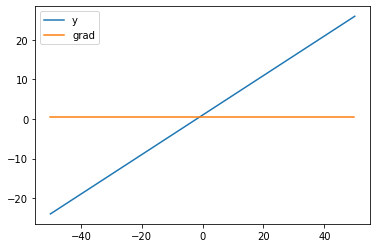

In [6]:
plt.plot(x, y, label='y')
plt.plot(x[:-1], grad, label='grad')
plt.legend();

## 【問題5】pythonの関数化
問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。  
そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。
$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$
また、問題4と同様にグラフを描いてください。  
ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

In [7]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    x = np.arange(*x_range)
    y = function(x)
    array_xy = np.hstack((x[:,np.newaxis], y[:,np.newaxis]))
    gradient = (y[1:] - y[:-1]) / (x[1:] - x[:-1])
    return array_xy, gradient

In [8]:
def function1(array_x):
    array_y = array_x**2
    return array_y

def function2(array_x):
    array_y = 2 * array_x**2 + 2**array_x
    return array_y

def function3(array_x):
    array_y = np.sin(array_x**0.5)
    return array_y

In [9]:
array_xy_1, grad_1 = compute_gradient(function1, x_range=(-50, 50.1, 0.1))
array_xy_2, grad_2 = compute_gradient(function2, x_range=(-50, 50.1, 0.1))
array_xy_3, grad_3 = compute_gradient(function3, x_range=(0, 50.1, 0.1))

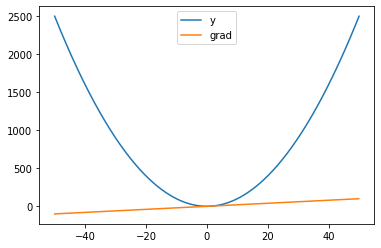

In [12]:
plt.plot(array_xy_1[:,0], array_xy_1[:,1], label='y')
plt.plot(array_xy_1[:-1,0], grad_1, label='grad')
plt.legend();

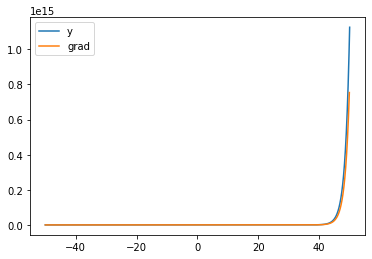

In [13]:
plt.plot(array_xy_2[:,0], array_xy_2[:,1], label='y')
plt.plot(array_xy_2[:-1,0], grad_2, label='grad')
plt.legend();

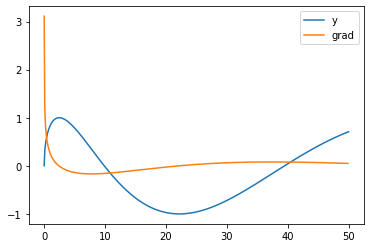

In [14]:
plt.plot(array_xy_3[:,0], array_xy_3[:,1], label='y')
plt.plot(array_xy_3[:-1,0], grad_3, label='grad')
plt.legend();

## 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。  
今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。  
minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。  
また、最小のyをとる前後の勾配を表示してください。

In [15]:
minimum_1 = np.min(array_xy_1[:,1])
argminimum_1 = np.argmin(array_xy_1[:,1])
minimum_1, argminimum_1

(5.048709793414476e-25, 500)

In [16]:
print(grad_1[499:502])

[-0.1  0.1  0.3]


In [17]:
minimum_2 = np.min(array_xy_2[:,1])
argminimum_2 = np.argmin(array_xy_2[:,1])
minimum_2, argminimum_2

(0.9505505632959851, 498)

In [18]:
print(grad_2[497:500])

[-0.41701833  0.02482428  0.46967008]


In [19]:
minimum_3 = np.min(array_xy_3[:,1])
argminimum_3 = np.argmin(array_xy_3[:,1])
minimum_3, argminimum_3

(-0.9999997540298113, 222)

In [20]:
print(grad_3[221:224])

[-0.00063884  0.00048745  0.00160612]
